In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [14]:
data = pd.read_csv("../output/eclipsing_binary/lgbm_eclipsing_binary_top25_smNone.txt", sep=",", header=None)
data.columns = ["acc", "lr","n_estimators"]
data

,acc,lr,n_estimators
0,0.802250,0.001,200
1,0.811467,0.001,225
2,0.816611,0.001,250
3,0.819870,0.001,275
4,0.847572,0.001,300
...,...,...,...
220,0.904949,0.300,300
221,0.907314,0.300,325
222,0.909071,0.300,350
223,0.896624,0.300,375


In [28]:
lr = np.array(data["lr"].values).reshape((-1,9))
n_estimators = np.array(data["n_estimators"].values).reshape((-1,9))
acc = np.array(data["acc"].values).reshape((-1,9))
print(acc.shape)
max_idx = np.unravel_index(acc.argmax(), acc.shape)
x = lr[max_idx]
y = n_estimators[max_idx]
z = acc[max_idx]

print(lr)

(25, 9)
[[0.001      0.001      0.001      0.001      0.001      0.001
  0.001      0.001      0.001     ]
 [0.01345833 0.01345833 0.01345833 0.01345833 0.01345833 0.01345833
  0.01345833 0.01345833 0.01345833]
 [0.02591667 0.02591667 0.02591667 0.02591667 0.02591667 0.02591667
  0.02591667 0.02591667 0.02591667]
 [0.038375   0.038375   0.038375   0.038375   0.038375   0.038375
  0.038375   0.038375   0.038375  ]
 [0.05083333 0.05083333 0.05083333 0.05083333 0.05083333 0.05083333
  0.05083333 0.05083333 0.05083333]
 [0.06329167 0.06329167 0.06329167 0.06329167 0.06329167 0.06329167
  0.06329167 0.06329167 0.06329167]
 [0.07575    0.07575    0.07575    0.07575    0.07575    0.07575
  0.07575    0.07575    0.07575   ]
 [0.08820833 0.08820833 0.08820833 0.08820833 0.08820833 0.08820833
  0.08820833 0.08820833 0.08820833]
 [0.10066667 0.10066667 0.10066667 0.10066667 0.10066667 0.10066667
  0.10066667 0.10066667 0.10066667]
 [0.113125   0.113125   0.113125   0.113125   0.113125   0.113125


In [29]:
# plt.imshow(acc, cmap='jet', interpolation='nearest')
#
# plt.xticks(np.linspace(0.001, 0.3, 25))
# plt.yticks(range(200, 401, 25))
# plt.xlabel("learning_rate")
# plt.ylabel("n_estimators")
# plt.colorbar()



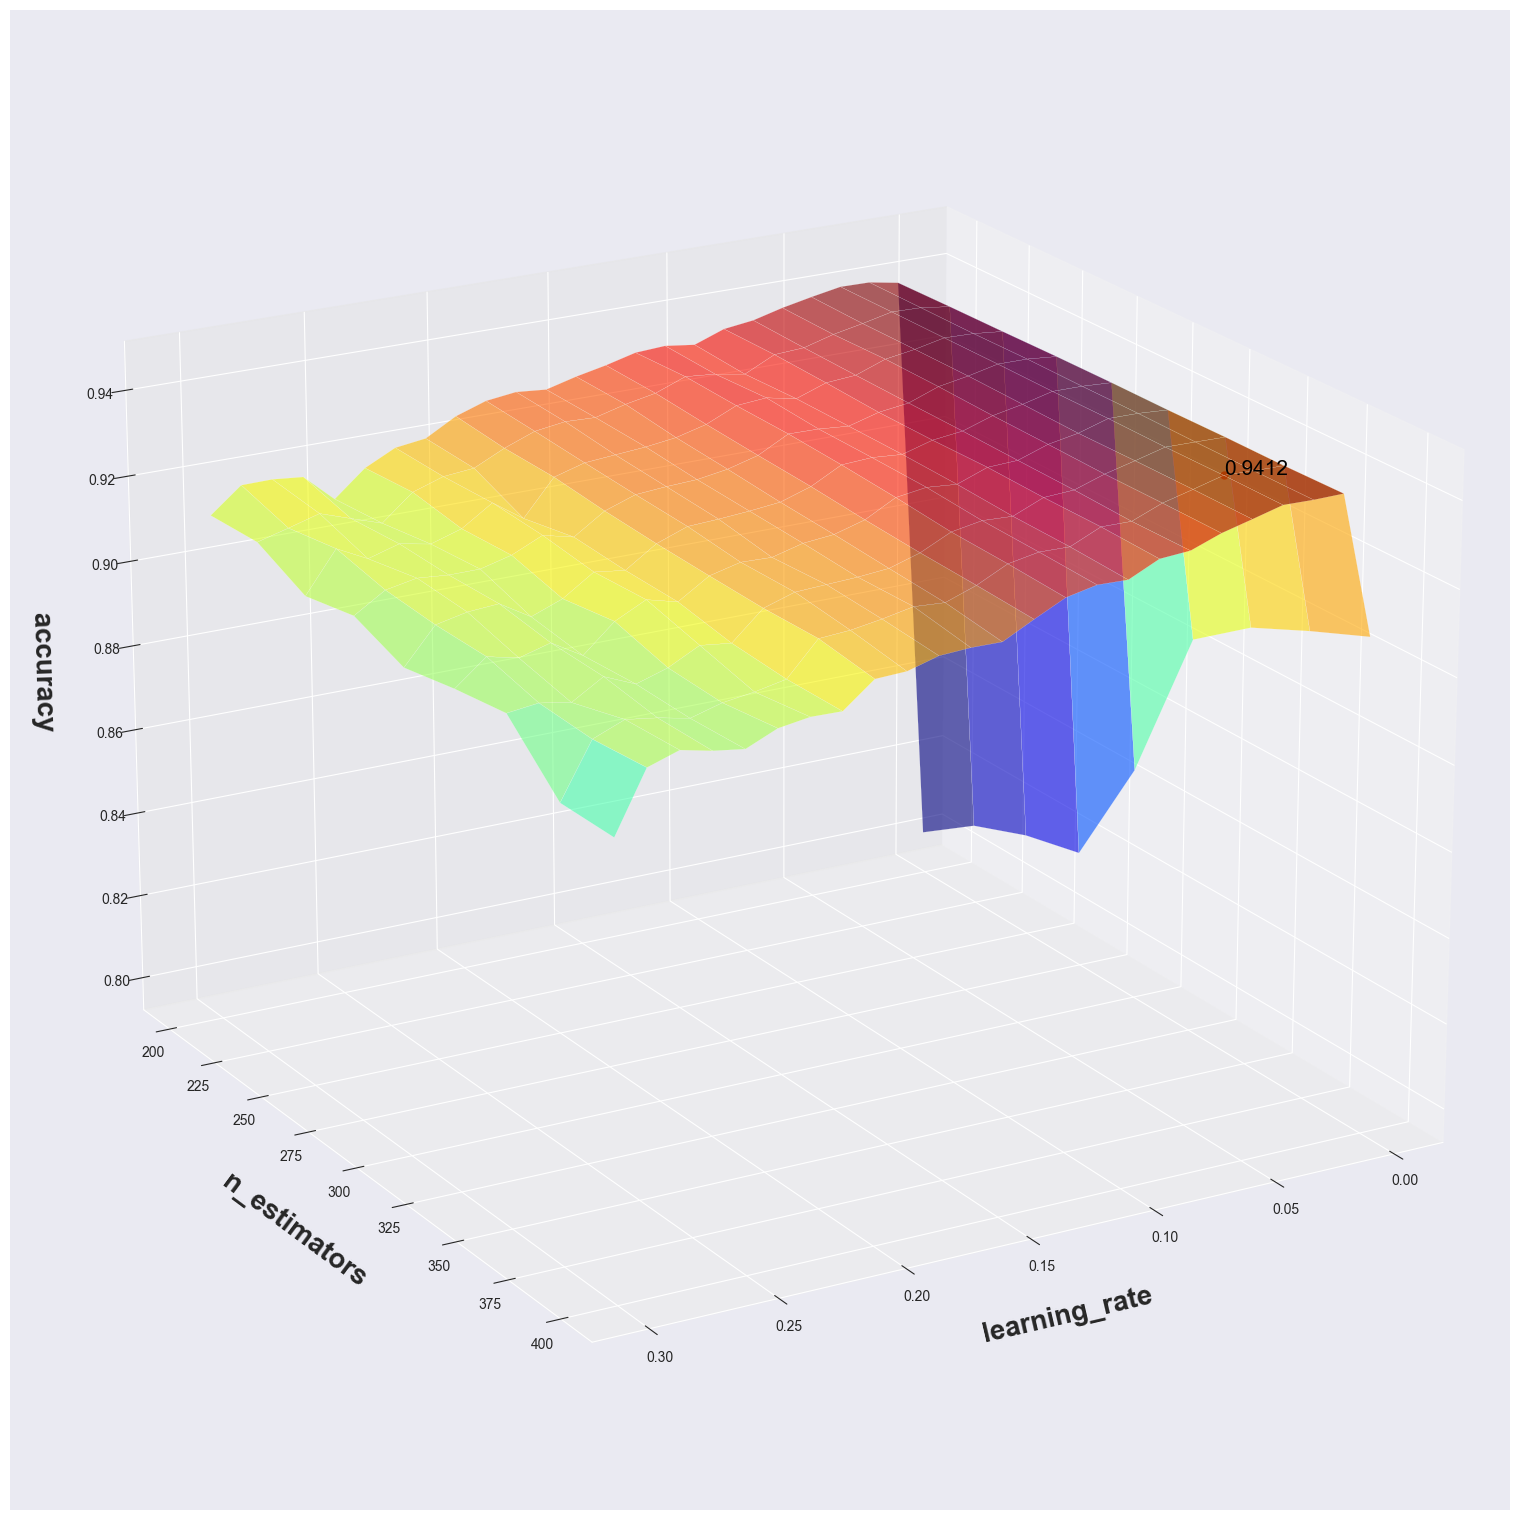

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15), dpi=100)
ax = Axes3D(fig, azim=60, elev=20)
fig.add_axes(ax)
# ax.scatter(lr, n_estimators, acc, c=acc, cmap='jet')

# map_color = {-1: 'red', 0: 'orange', 1: 'brown', 2: 'blue', 3: 'yellow', 4: 'green'}
# color = [map_color[i] for i in frequency_hats]
ax.scatter(x, y, z, c='red', s=25, marker='o')
ax.text(x, y, z, "{:.4f}".format(z), color='black', size=15)

#
ax.plot_surface(lr, n_estimators, acc, cmap='jet', alpha=0.6, linewidth=0.1)
ax.set_xlabel("learning_rate", labelpad=20, fontsize=20, fontweight='bold')
ax.set_ylabel("n_estimators", labelpad=20, fontsize=20, fontweight='bold')
ax.set_zlabel("accuracy", labelpad=20, fontsize=20, fontweight='bold')
# ax.set_title(lc.meta["source_id"])
plt.show()